In [1]:
import torch
from torch.nn.functional import softmax
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tensor = torch.randn((5, 5),requires_grad=True)
tensor

tensor([[-1.5246,  1.8444,  1.0658, -1.8735, -0.3476],
        [-2.8953, -1.4088,  0.5241, -1.3285, -1.4007],
        [-0.9502, -0.3615,  0.3486, -0.0225, -0.9205],
        [-0.1483, -0.4382, -1.5779,  1.0842,  0.1283],
        [-2.2714, -0.9273, -0.4972,  0.6732,  1.7200]], requires_grad=True)

In [3]:
def spatial_softmax2d(tensor):
    p = torch.reshape(softmax(torch.reshape(tensor, (-1,)), dim=0), tensor.shape)
    grid_y, grid_x = torch.meshgrid(torch.arange(0, tensor.shape[0]), torch.arange(0, tensor.shape[1]))
    x = torch.sum(grid_x.float() * p)
    y = torch.sum(grid_y.float() * p)
    return p, x, y

p, x, y = spatial_softmax2d(tensor)
p, x, y

(tensor([[0.0070, 0.2031, 0.0932, 0.0049, 0.0227],
         [0.0018, 0.0078, 0.0542, 0.0085, 0.0079],
         [0.0124, 0.0224, 0.0455, 0.0314, 0.0128],
         [0.0277, 0.0207, 0.0066, 0.0950, 0.0365],
         [0.0033, 0.0127, 0.0195, 0.0630, 0.1793]], grad_fn=<ViewBackward>),
 tensor(2.3501, grad_fn=<SumBackward0>),
 tensor(2.0001, grad_fn=<SumBackward0>))

In [4]:
target_x, target_y = torch.rand(2) * torch.tensor(tensor.shape, dtype=torch.float)
target_x, target_y

(tensor(0.8821), tensor(0.6533))

In [5]:
target = torch.zeros(tensor.shape)
target[target_y.int(), target_x.int()] = 1
target

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

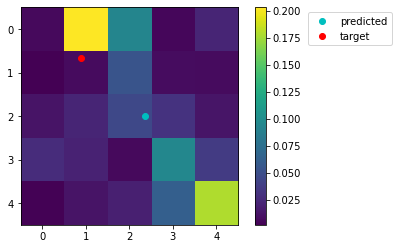

In [6]:
def plot_figure(p, predictions, target_x, target_y):
    xs = [x.detach().numpy() for (x, y) in predictions]
    ys = [y.detach().numpy() for (x, y) in predictions]

    plt.imshow(p.detach().numpy(), cmap='viridis', extent=(-0.5, p.shape[1] - 0.5, p.shape[0] - 0.5, -0.5))
    plt.colorbar()    
    plt.plot(xs, ys, 'co')
    plt.plot(target_x.detach().numpy(), target_y.detach().numpy(), 'ro')
    plt.legend(['predicted', 'target'], loc='upper left', bbox_to_anchor=(1.3, 1))
    plt.show()
    
plot_figure(p, [(x, y)], target_x, target_y)

In [7]:
predictions = []

# Run this multiple times with Ctrl+Enter
To test the negative learning, set negative=True in gradient_step() call.

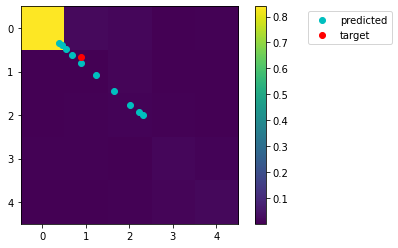

tensor(0.2109, grad_fn=<NegBackward>)

In [8]:
def gradient_step(tensor, p, target, lr=1.0, negative=False):
    loss = -torch.sum(target * torch.log(p))
    if negative:
        loss = -loss
    loss.backward()
    with torch.no_grad():
        tensor -= lr * tensor.grad
        tensor.grad.zero_()
    return loss

for _ in range(10):
    loss = gradient_step(tensor, p, target, negative=False)
    p, x, y = spatial_softmax2d(tensor)
    predictions.append((x, y))
plot_figure(p, predictions, target_x, target_y)
loss

In [9]:
tensor

tensor([[ 4.5580,  0.8445,  0.4965, -1.9121, -0.5149],
        [-2.9093, -1.4695,  0.1590, -1.3942, -1.4620],
        [-1.0448, -0.5266,  0.0348, -0.2480, -1.0179],
        [-0.3494, -0.5919, -1.6294,  0.5067, -0.1300],
        [-2.2975, -1.0241, -0.6427,  0.2591,  0.8001]], requires_grad=True)